### Image Size Compress Editing

In [1]:
# pip install imutils

In [10]:
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import os
import sys
import imutils
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import shutil
import os 
from os.path import isfile, join
import glob
import time
import cv2

#### Image Compress

In [34]:
def compress_image(input_path, output_path, quality=80):
    # Resmi aç
    with Image.open(input_path) as img:
        # RGB moduna dönüştür (gerekirse)
        img = img.convert('RGB')
        # Sıkıştırılmış resmi kaydet
        #img.save(output_path, 'JPEG', optimize=True, quality=quality)  # JPG
        img.save(output_path, 'WEBP', optimize=True, quality=quality)   # WEBP

In [35]:
input_image = r'C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\MONTREAL-QUEBEC.jpeg'
output_image = r'C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Result\Test_Result\MONTREAL-QUEBEC2.webp'

In [36]:
compress_image(input_image, output_image, quality=80)

In [37]:
input_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data"
output_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Result\Test_Result\Test"
Path(output_image_path).mkdir(parents=True, exist_ok=True)

In [38]:
image_file_list = glob.glob(fr"{input_image_path}\*")
image_file_list

['C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC-Resize.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC2.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC3.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\Road.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-1.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-12.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-13.webp']

In [39]:
result_path = f"{output_image_path}"
Path(result_path).mkdir(parents=True, exist_ok=True)
for img_file in image_file_list:
    img_file_name = os.path.basename(f"{img_file}")
    img_file_no_ext = os.path.splitext(img_file_name)[0]
    output_image = f"{result_path}\\{img_file_no_ext}.webp"
    compress_image(img_file, output_image, quality=80)

#### OS Path Test

In [40]:
glob.glob(r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\*")

['C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC-Resize.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC2.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC3.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\Road.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-1.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-12.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-13.webp']

In [41]:
os.listdir(r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data")

['MONTREAL-QUEBEC-Resize.jpg',
 'MONTREAL-QUEBEC.jpeg',
 'MONTREAL-QUEBEC2.jpeg',
 'MONTREAL-QUEBEC3.webp',
 'Road.jpg',
 'vancouver-house-1.webp',
 'vancouver-house-12.jpeg',
 'vancouver-house-13.webp']

In [42]:
os.path.dirname(r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\MONTREAL-QUEBEC.jpeg")

'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data'

In [43]:
os.path.basename(r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\MONTREAL-QUEBEC.jpeg")

'MONTREAL-QUEBEC.jpeg'

In [44]:
os.path.splitext(os.path.basename("/path/to/file.txt"))[0]

'file'

In [45]:
os.path.splitext(os.path.basename("/path/to/file.txt"))[1]

'.txt'

#### OpenCV Image Resize

In [46]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [47]:
img = cv2.imread(r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\MONTREAL-QUEBEC.jpeg")  # Note: Not working file path if any turkish character in file path name
# img

In [48]:
image = image_resize(img, width = 1280, height = None, inter = cv2.INTER_AREA)
image

array([[[162, 144, 157],
        [161, 144, 159],
        [161, 145, 158],
        ...,
        [115, 149, 191],
        [114, 148, 191],
        [119, 151, 188]],

       [[161, 145, 158],
        [161, 145, 159],
        [161, 145, 158],
        ...,
        [114, 148, 191],
        [114, 148, 191],
        [120, 151, 189]],

       [[160, 145, 157],
        [162, 145, 158],
        [160, 147, 158],
        ...,
        [115, 149, 192],
        [115, 149, 192],
        [118, 151, 188]],

       ...,

       [[ 21, 137,  94],
        [ 19, 135,  94],
        [ 25, 149, 104],
        ...,
        [ 72,  83,  96],
        [ 72,  83,  94],
        [105, 119, 130]],

       [[ 25, 145, 101],
        [ 26, 148, 102],
        [ 27, 159, 110],
        ...,
        [ 75,  87, 100],
        [ 76,  87, 100],
        [107, 121, 134]],

       [[ 79, 171, 137],
        [ 78, 181, 143],
        [ 78, 172, 138],
        ...,
        [114, 128, 138],
        [113, 127, 137],
        [137, 153, 163]]

#### PIL Image Resize

In [49]:
input_image = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data\MONTREAL-QUEBEC.jpeg"

In [50]:
im = Image.open(input_image)
width, height = im.size
im = im.resize((width//2, height//2))

In [51]:
im.save("MONTREAL-QUEBEC-Resize.jpeg")
im.save("MONTREAL-QUEBEC-Resize.webp")

##### For Loop

In [52]:
input_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data"
output_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Result\Test_Result\Test2"
Path(output_image_path).mkdir(parents=True, exist_ok=True)

In [53]:
image_file_list = glob.glob(fr"{input_image_path}\*")
image_file_list

['C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC-Resize.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC2.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\MONTREAL-QUEBEC3.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\Road.jpg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-1.webp',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-12.jpeg',
 'C:\\Users\\user\\Desktop\\Data Analysis\\Adoba\\Image_Editing\\Data\\Test_Data\\vancouver-house-13.webp']

In [54]:
# result_path = f"{input_image_path}\\Test2"
# Path(result_path).mkdir(parents=True, exist_ok=True)

In [55]:
# all_files = []
# success_file = []
error_files = []
width_fixed = 1280
result_path = f"{output_image_path}"
Path(result_path).mkdir(parents=True, exist_ok=True)
for img_file in image_file_list:
    img_file_name = os.path.basename(f"{img_file}")
    img_file_no_ext = os.path.splitext(img_file_name)[0]
    # all_files.append(img_file_name)
    im = Image.open(img_file)
    width, height = im.size
    try:
        if width <= width_fixed:
            #im.save(f"{result_path}\\{img_file_name}")
            im.save(f"{result_path}\\{img_file_no_ext}.webp")
            # success_file.append(img_file_name)
        else:
            width_var = int(width_fixed)
            height_var = int((width_fixed/width)*height)
            im = im.resize((width_var, height_var))
            #im.save(f"{result_path}\\{img_file_name}")
            im.save(f"{result_path}\\{img_file_no_ext}.webp")
            # success_file.append(img_file_name)
    except:
        # pass
        error_files.append(img_file_name)
    
# print(list(set(all_files).difference(set(success_file))))    

##### Function

In [56]:
input_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Data\Test_Data"
output_image_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Image_Editing\Result\Test_Result\Test3"
Path(output_image_path).mkdir(parents=True, exist_ok=True)

In [8]:
def image_resize(input_image_path, output_image_path, width_fixed = 1280):
    image_file_list = glob.glob(fr"{input_image_path}\*")
    error_files = []
    # width_fixed = 1280
    result_path = f"{output_image_path}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    for img_file in image_file_list:
        img_file_name = os.path.basename(f"{img_file}")
        img_file_no_ext = os.path.splitext(img_file_name)[0]
        im = Image.open(img_file)
        width, height = im.size
        try:
            if width <= width_fixed:
                im.save(f"{result_path}\\{img_file_no_ext}.webp")
            else:
                width_var = int(width_fixed)
                height_var = int((width_fixed/width)*height)
                im = im.resize((width_var, height_var))
                im.save(f"{result_path}\\{img_file_no_ext}.webp")
        except:
            error_files.append(img_file_name)
    
    return error_files

In [9]:
image_resize(input_image_path, output_image_path, width_fixed = 1280)

[]

#### Test

In [59]:
import numpy as np
import cv2
img = cv2.imread('MONTREAL-QUEBEC-Resize.webp')
height, width, channels = img.shape
print(height, width, channels)

1823 2735 3


#### Test 2

In [11]:
aspect_ratio_width = 2
aspect_ratio_height = 3
basewidth = 1200
size_width = int(basewidth)
size_heigth = int((basewidth/aspect_ratio_width)*aspect_ratio_height)
size = (size_width,size_heigth) 
print(size)

(1200, 1800)


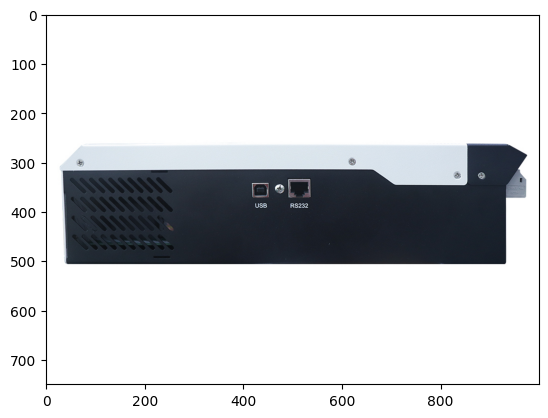

In [12]:
img = Image.open(r'C:\Users\user\Desktop\Hegel REVO-VP-5KW\Hegel REVO-VP-5KW-5.jpg')
plt.imshow(img)

In [13]:
width, height = img.size
height_var = int(height/aspect_ratio_height)
width_var = int(width/aspect_ratio_width)

if height_var == width_var:
    img_var = img.resize(size, Image.LANCZOS)
elif width_var > height_var:
    crop_width = int(abs((width-(height_var*aspect_ratio_width))/2))
    box = (crop_width,0,width-crop_width,height)  # left, top, right, bottom
    img_crop = img.crop(box)  
    img_var = img_crop.resize(size, Image.LANCZOS)
elif width_var < height_var:
    crop_height = int(abs((height-(width_var*aspect_ratio_height))/2))
    box = (0,crop_height,width,height-crop_height)  # left, top, right, bottom
    img_crop = img.crop(box)  # left, top, right, bottom
    img_var = img_crop.resize(size, Image.LANCZOS)
else:
    img_var = img

img_var.save(r"C:\Users\user\Desktop\Hegel REVO-VP-5KW\Hegel REVO-VP-5KW-5 edit.jpg")

In [14]:
def convert_image_to_jpg_crop_size(filename_list, data_folder_name, data_path, out_folder_name, out_path):
    '''
    convert_image_to_jpg_crop_size(filename_list, data_folder_name, data_path, out_folder_name, out_path)\n
    filename_list is image filename list. data_folder_name, data_path, out_folder_name and out_path are path and folder in string.\n
    ex.\n
    path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    convert_image_to_jpg_crop_size(word_list, image_data_folder_name, image_data_path, "Image_JPG_Crop", data_path)
    '''
    aspect_ratio_width = 16
    aspect_ratio_height = 9
    basewidth = 1600
    size_width = int(basewidth)
    size_heigth = int((basewidth/aspect_ratio_width)*aspect_ratio_height)
    size = (size_width,size_heigth)

    result_path = f"{out_path}/{out_folder_name}"
    result_path2 = f"{out_path}/Images_JPG"
    data_folder_path = f"{data_path}/{data_folder_name}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    Path(result_path2).mkdir(parents=True, exist_ok=True)

    files=[f for f in os.listdir(data_folder_path) if isfile(join(data_folder_path,f))]     
    for i in range(len(files)):
        #text = f"{text}"
        pathfilename=data_folder_path+'/'+files[i]
        filename_without_ext = os.path.splitext(files[i])[0]
        try:
            if isfile(f"{result_path2}/{filename_without_ext}.jpg"):
                pass
            else:
                img = Image.open(pathfilename)
                img2 = img.convert("RGB")
                img2.save(f"{result_path2}/{filename_without_ext}.jpg")
                time.sleep(0.1)
        except:
            print("Oops!", sys.exc_info()[0], "occurred.")

    for filename in filename_list:    
        if isfile(f"{result_path}/{filename}.jpg"):
            pass
        else:
            try:
                img3 = Image.open(f"{result_path2}/{filename}.jpg")  # ???
                width, height = img3.size
                height_var = int(height/aspect_ratio_height)
                width_var = int(width/aspect_ratio_width)

                if height_var == width_var:
                    img_var = img3.resize(size, Image.LANCZOS)
                elif width_var > height_var:
                    crop_width = int(abs((width-(height_var*aspect_ratio_width))/2))
                    box = (crop_width,0,width-crop_width,height)  # left, top, right, bottom
                    img_crop = img3.crop(box)  
                    img_var = img_crop.resize(size, Image.LANCZOS)
                elif width_var < height_var:
                    crop_height = int(abs((height-(width_var*aspect_ratio_height))/2))
                    box = (0,crop_height,width,height-crop_height)  # left, top, right, bottom
                    img_crop = img3.crop(box)  # left, top, right, bottom
                    img_var = img_crop.resize(size, Image.LANCZOS)
                else:
                    img_var = img3

                img_var.save(f"{result_path}/{filename}.jpg")

            except:
                print("Oops!", sys.exc_info()[0], "occurred.")

In [16]:
filename_list = ["Hegel REVO-VP-5KW-5","Hegel REVO-VP-5KW"]

In [17]:
data_folder_name = "Hegel REVO-VP-5KW"
data_path = r"C:\Users\user\Desktop"
out_folder_name = "Edit"
out_path = r"C:\Users\user\Desktop\New"

In [18]:
convert_image_to_jpg_crop_size(filename_list, data_folder_name, data_path, out_folder_name, out_path)

### Solar Image Aspect Ratio

In [1]:
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import os
import sys
import imutils
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import shutil
import os 
from os.path import isfile, join
import glob
import time
import cv2

#### Functions

In [2]:
def image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9):
       '''
       image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)\n
       data_folder_name, data_path, out_folder_name, out_path are path and folder in string(str). others are cv2 parameter and image aspect ratio parameter.\n
       ex.\n
       output_path = f"/home/kurubal/Documents/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/28 Words"\n
       image_path = f"/home/kurubal/Documents/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/28 Words"\n
       image_padding_aspect_ratio("Images_SV_Rename", image_path, "Images_SV", output_path, padding_color = (0,0,0), aspect_ratio_width = 16, aspect_ratio_height = 9)
       '''
       error_file_list = []
       result_path = f"{out_path}/{out_folder_name}"
       data_folder_path = f"{data_path}/{data_folder_name}"
       Path(result_path).mkdir(parents=True, exist_ok=True)
       files=[f for f in os.listdir(data_folder_path) if isfile(join(data_folder_path,f))]   
       for i in range(len(files)):       
          pathfilename=data_folder_path+'/'+files[i]
          #filename_without_ext = os.path.splitext(files[i])[0]
          #text = f"{text}"
          if isfile(f"{result_path}/{files[i]}"):
                 pass
          else:
                 try:
                        img = cv2.imread(f"{pathfilename}")
                        old_image_height, old_image_width, channels = img.shape  # 2718  1988

                        #aspect_ratio_width = 16
                        #aspect_ratio_height = 9

                        if (old_image_height/aspect_ratio_height) > (old_image_width/aspect_ratio_width):
                               new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                               new_image_height = int(old_image_height)
                        elif (old_image_height/aspect_ratio_height) < (old_image_width/aspect_ratio_width):
                               new_image_width = int(old_image_width)
                               new_image_height = int((old_image_width/aspect_ratio_width)*aspect_ratio_height)
                        elif (old_image_height/aspect_ratio_height) == (old_image_width/aspect_ratio_width):
                               new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
                               new_image_height = int(old_image_height)
                        else:
                               new_image_width = old_image_width
                               new_image_height = old_image_height

                        color = padding_color
                        result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

                        # compute center offset
                        x_center = (new_image_width - old_image_width) // 2
                        y_center = (new_image_height - old_image_height) // 2

                        # copy img image into center of result image
                        result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img            

                        cv2.imwrite(f"{result_path}/{files[i]}", result)
                 except:
                        print("Oops!", sys.exc_info()[0], "occurred.")
                        error_file_list.append(files[i])
                        
       return error_file_list


In [3]:
def convert_image_to_jpg_crop_size(data_folder_name, data_path, out_folder_name, out_path, basewidth = 1800, aspect_ratio_width = 2, aspect_ratio_height = 3):
    '''
    convert_image_to_jpg_crop_size(filename_list, data_folder_name, data_path, out_folder_name, out_path)\n
    filename_list is string image filename list. data_folder_name, data_path, out_folder_name and out_path are path and folder in string.\n
    ex.\n
    path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    convert_image_to_jpg_crop_size(word_group_list1, "Images", image_data_path, "Image_JPG_Crop", data_path)
    '''
    # aspect_ratio_width = 16
    # aspect_ratio_height = 9
    # basewidth = 1600

    size_width = int(basewidth)
    size_heigth = int((basewidth/aspect_ratio_width)*aspect_ratio_height)
    size = (size_width,size_heigth)

    result_path = f"{out_path}/{out_folder_name}"
    result_path2 = f"{out_path}/{data_folder_name}_WEBP"  # _WEBP, _JPG
    data_folder_path = f"{data_path}/{data_folder_name}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    Path(result_path2).mkdir(parents=True, exist_ok=True)

    files=[f for f in os.listdir(data_folder_path) if isfile(join(data_folder_path,f))]     
    for i in range(len(files)):
        #text = f"{text}"
        pathfilename=data_folder_path+'/'+files[i]
        filename_without_ext = os.path.splitext(files[i])[0]
        try:
            if isfile(f"{result_path2}/{filename_without_ext}.webp"):  # .jpg .webp
                pass
            else:
                img = Image.open(pathfilename)
                img2 = img.convert("RGB")
                img2.save(f"{result_path2}/{filename_without_ext}.webp")  # .jpg .webp
                time.sleep(0.1)
        except:
            print("Oops!", sys.exc_info()[0], "occurred.")

    files2=[f for f in os.listdir(result_path2) if isfile(join(result_path2,f))] 
    for j in range(len(files2)):
        pathfilename2=result_path2+'/'+files2[j]
        filename_without_ext2 = os.path.splitext(files2[j])[0]    
        if isfile(f"{result_path}/{filename_without_ext2}.webp"):  # .jpg .webp
            pass
        else:
            try:
                img3 = Image.open(pathfilename2)  # ???
                width, height = img3.size
                height_var = int(height/aspect_ratio_height)
                width_var = int(width/aspect_ratio_width)

                if height_var == width_var:
                    img_var = img3.resize(size, Image.LANCZOS)
                elif width_var > height_var:
                    crop_width = int(abs((width-(height_var*aspect_ratio_width))/2))
                    box = (crop_width,0,width-crop_width,height)  # left, top, right, bottom
                    img_crop = img3.crop(box)  
                    img_var = img_crop.resize(size, Image.LANCZOS)
                elif width_var < height_var:
                    crop_height = int(abs((height-(width_var*aspect_ratio_height))/2))
                    box = (0,crop_height,width,height-crop_height)  # left, top, right, bottom
                    img_crop = img3.crop(box)  # left, top, right, bottom
                    img_var = img_crop.resize(size, Image.LANCZOS)
                else:
                    img_var = img3

                img_var.save(f"{result_path}/{filename_without_ext2}.webp")  # .jpg .webp

            except:
                print("Oops!", sys.exc_info()[0], "occurred.")

#### Data Folder

In [9]:
image_data_folder = r"C:\Users\user\Desktop\Solar Zirve Image Burak"

In [10]:
image_folder_path_list = glob.glob(rf"{image_data_folder}\*")
image_folder_path_list

['C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\3HR210-801.8A',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4US1100-964C',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4US1300-957.5D',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4US1500-1157.5E4US1500-1157.5E',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4US1500-2034.5E',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4US750-804B',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4USH2200-12511H',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4USH2200-21011H',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\4USH2200-2307.5H',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\BS-MC4',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\CPM-H2200-2575H',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\HG12-100',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\HG12-150',
 'C:\\Users\\user\\Desktop\\Solar Zirve Image Burak\\HG12-200',
 'C:\\Users\\user\\Desktop\\So

In [11]:
# for image_folder_path in image_folder_path_list:
#     data_path = os.path.dirname(image_folder_path)
#     data_folder_name = os.path.basename(image_folder_path)
#     out_path = image_folder_path
#     out_folder_name = "Edit"
#     print(out_path)

In [12]:
# for image_folder_path in image_folder_path_list:
#     try:
#         data_path = os.path.dirname(image_folder_path)
#         data_folder_name = os.path.basename(image_folder_path)
#         out_path = image_folder_path
#         out_folder_name = "Edit"
#         image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (255,255,255), aspect_ratio_width = 2, aspect_ratio_height = 3)
#     except:
#         pass

In [13]:
for image_folder_path in image_folder_path_list:
    try:
        aspect_data_path = os.path.dirname(image_folder_path)
        aspect_data_folder_name = os.path.basename(image_folder_path)
        aspect_out_path = image_folder_path
        aspect_out_folder_name = "Edit_Temp"
        crop_data_path = aspect_out_path
        crop_data_folder_name = aspect_out_folder_name
        crop_out_path = image_folder_path
        crop_out_folder_name = "1200X1800_Webp"
        image_padding_aspect_ratio(aspect_data_folder_name, aspect_data_path, aspect_out_folder_name, aspect_out_path, padding_color = (255,255,255), aspect_ratio_width = 2, aspect_ratio_height = 3)
        convert_image_to_jpg_crop_size(crop_data_folder_name, crop_data_path, crop_out_folder_name, crop_out_path, basewidth = 1200, aspect_ratio_width = 2, aspect_ratio_height = 3)
    except:
        pass

Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'AttributeError'> occurred.
Oops! <class 'At

#### Test

In [8]:
data_folder_name = "HGEX6-225"
data_path = r"C:\Users\user\Desktop\Burak"
out_folder_name = "Edit"
out_path = r"C:\Users\user\Desktop\Burak\HGEX6-225"

In [9]:
image_padding_aspect_ratio(data_folder_name, data_path, out_folder_name, out_path, padding_color = (255,255,255), aspect_ratio_width = 2, aspect_ratio_height = 3)

[]

In [ ]:
var = image_folder_list[5]
var

'C:\\Users\\user\\Desktop\\Solar Image2\\Betatek WP80D-BT'

In [ ]:
os.path.basename(var)

'Betatek WP80D-BT'

In [ ]:
os.path.splitext(var)[0]

'C:\\Users\\user\\Desktop\\Solar Image2\\Betatek WP80D-BT'

In [ ]:
os.path.dirname(var)

'C:\\Users\\user\\Desktop\\Solar Image2'

In [58]:
var = image_folder_list[5]
var

'C:\\Users\\user\\Desktop\\Solar Image2\\Betatek WP80D-BT'

In [59]:
data_path = os.path.dirname(var)
data_path

'C:\\Users\\user\\Desktop\\Solar Image2'

In [60]:
data_folder_name = os.path.basename(var)
data_folder_name

'Betatek WP80D-BT'

In [61]:
out_path = var
out_path

'C:\\Users\\user\\Desktop\\Solar Image2\\Betatek WP80D-BT'

In [64]:
out_folder_name = rf"{var}\Edit"
out_folder_name

'C:\\Users\\user\\Desktop\\Solar Image2\\Betatek WP80D-BT\\Edit'

In [ ]:
data_path = os.path.dirname(image_folder_path)
data_folder_name = os.path.basename(image_folder_path)
out_path = image_folder_path
out_folder_name = rf"{image_folder_path}\\Edit"